# SALT2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sncosmo
sncosmo.__version__

'2.12.1'

## Source

SNCosmo comes with many "sources", i.e. SED templates: https://sncosmo.readthedocs.io/en/stable/source-list.html.

As this is a SALT2 tutorial, we will load the SALT2 source and create a model with it.

In [2]:
# create a model with SALT2 as source and with Milky-Way dust extinction
dust = sncosmo.CCM89Dust()  # dust extinction law to use
model = sncosmo.Model(source='salt2',
                      effects=[dust],
                      effect_names=['mw'],
                      effect_frames=['obs'],  # observer-frame
)

Luckily, SNCosmo comes with example data we can use. Input data needs to be an **astropy Table** object.

In [3]:
data = sncosmo.load_example_data()
data

time,band,flux,fluxerr,zp,zpsys
float64,str5,float64,float64,float64,str2
55070.0,sdssg,0.36351153597,0.672843847541,25.0,ab
55072.0512821,sdssr,-0.200801295864,0.672843847541,25.0,ab
55074.1025641,sdssi,0.307494232981,0.672843847541,25.0,ab
55076.1538462,sdssz,1.08776103656,0.672843847541,25.0,ab
55078.2051282,sdssg,-0.43667895645,0.672843847541,25.0,ab
55080.2564103,sdssr,1.09780966779,0.672843847541,25.0,ab
55082.3076923,sdssi,3.7562685627,0.672843847541,25.0,ab
55084.3589744,sdssz,5.34858894966,0.672843847541,25.0,ab
55086.4102564,sdssg,2.82614187269,0.672843847541,25.0,ab


## Fitting

Fitting is straight forward. Note that different models will have different set of parameters to use.

In [4]:
# you can fix some parameters
ebv = 0.1  # MW E(B-V); RV = 3.1 by default
model.set(mwebv=ebv)

# run the fit
result, fitted_model = sncosmo.fit_lc(data, model,
                                      ['z', 't0', 'x0', 'x1', 'c'],  # parameters of model to vary
                                      bounds={'z':(0.3, 0.7)})  # bounds on parameters (if any)

SALT 2 parameters:
 * $t_0$: time of *B*-band peak
 * $x_0$: amplitude ($m_B^{\rm max} = -2.5*log_{10}(x_0) + 10.653$)
 * $x_1$: light-curve stretch/width
 * $c$: SN colour ($(B-V)$ at peak, approx.)

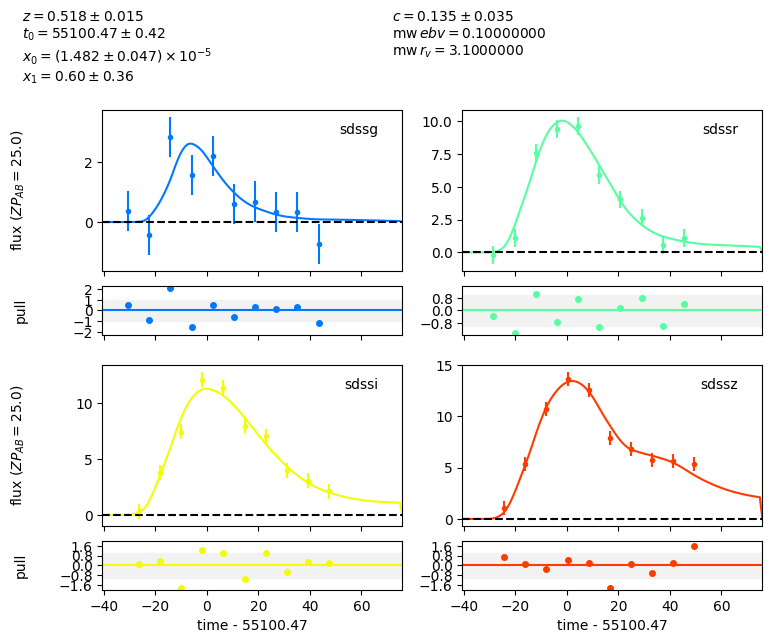

In [5]:
sncosmo.plot_lc(data, model=fitted_model, errors=result.errors);

## Results

In [6]:
result

      success: True
      message: 'Minimization exited successfully.'
        ncall: 151
        chisq: 33.142994622836255
         ndof: 35
  param_names: ['z', 't0', 'x0', 'x1', 'c', 'mwebv', 'mwr_v']
   parameters: array([5.17509608e-01, 5.51004721e+04, 1.48166238e-05, 5.95536314e-01,
       1.34730727e-01, 1.00000000e-01, 3.10000000e+00])
 vparam_names: ['z', 't0', 'x0', 'x1', 'c']
   covariance: array([[ 2.23887802e-04,  1.14691877e-03,  4.48680333e-10,
        -3.48880178e-04, -3.04149257e-04],
       [ 1.14691877e-03,  1.74741437e-01, -3.24829417e-08,
         4.53367830e-02, -7.19326127e-04],
       [ 4.48680333e-10, -3.24829417e-08,  2.19172883e-13,
        -9.76087407e-08, -9.84791136e-09],
       [-3.48880178e-04,  4.53367830e-02, -9.76087407e-08,
         1.27076403e-01,  2.42628421e-03],
       [-3.04149257e-04, -7.19326127e-04, -9.84791136e-09,
         2.42628421e-03,  1.22248322e-03]])
       errors: OrderedDict({'z': 0.014948818584795742, 't0': 0.41801940557343187, 'x

In [7]:
# extract parameters
pid = result.param_names.index('x1')
x1 = result.parameters[pid]

/home/tomas/miniforge3/envs/fitters/lib/python3.13/site-packages/sncosmo/models.py:189: RuntimeWarning: divide by zero encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)


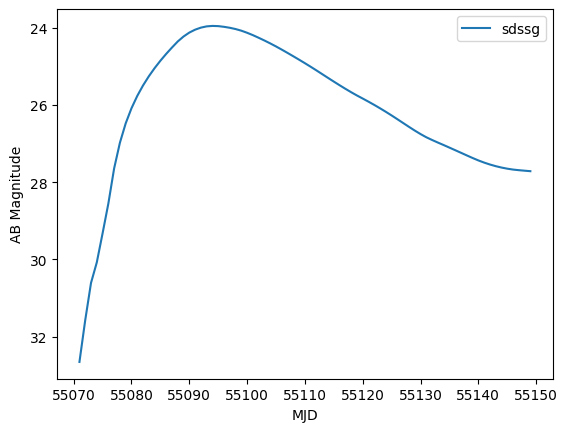

In [8]:
# the model light curves can also be extracted
band = 'sdssg'
magsys = 'ab'
time = np.arange(data['time'].min(), data['time'].max(), 1)
mag = fitted_model.bandmag(band, magsys, time)  # using the fitted model

fig, ax = plt.subplots()
ax.plot(time, mag, label=band)
ax.invert_yaxis()
ax.set_xlabel('MJD')
ax.set_ylabel('AB Magnitude')
ax.legend()
plt.show()

**Note**: SNCosmo comes with several filters sets and sources, but the first time you use them it might take some time to download them first